In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Данные 


In [2]:
df = pd.read_excel('C:/Users/Эдуард/Desktop/задание кафедры/train.xlsx')
df_test = pd.read_excel('C:/Users/Эдуард/Desktop/задание кафедры/test.xlsx')
model_info = pd.read_excel('C:/Users/Эдуард/Desktop/задание кафедры/models.xlsx')

In [3]:
df.head()

,Materia,"Youngs modulus, GPa","Ultimate strength, GPa","Yield strength, GPa","Hardness, HB","Melting temperature, K","Density, kg/dm^3","Capacity, J/kg*K"
0,022Cr19Ni10,191.55,0.913,0.230,175.0,1426.5,7.930,490.000
1,1.0722,200.00,0.565,0.235,130.0,1520.0,7.850,440.000
2,10SPb20,200.00,0.560,0.235,130.5,1520.0,7.850,440.000
3,11SMnPb30,205.00,0.590,0.333,173.5,1520.0,7.825,450.000
4,17-4 PH,168.00,0.977,0.848,229.0,1425.0,7.500,460.548


In [4]:
df_test.head()

,Materia,"Youngs modulus, GPa","Ultimate strength, GPa","Yield strength, GPa","Hardness, HB","Melting temperature, K","Density, kg/dm^3","Capacity, J/kg*K"
0,0Cr18Ni11Nb,189.8,0.520,0.206,187.0,1426.5,7.965,468.990
1,316,190.0,0.520,0.205,217.0,1371.0,7.933,468.990
2,A296 CG-8M,193.0,0.565,0.303,176.0,1399.0,7.750,502.416
3,A297 HW,172.0,0.414,0.303,195.0,1288.0,8.138,460.548
4,A351 CF3M\n,193.0,0.483,0.207,150.0,1427.0,7.750,502.416


<AxesSubplot:>

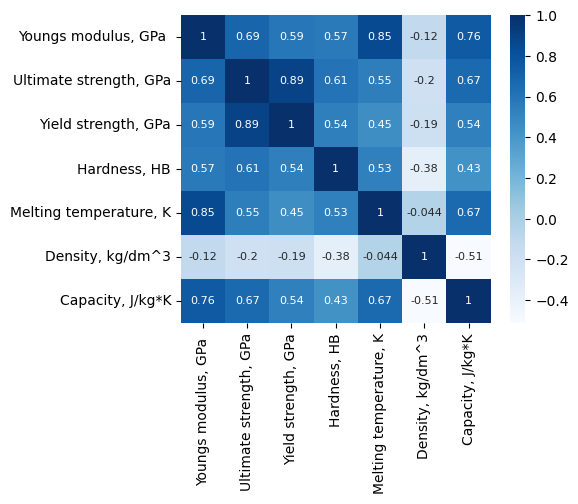

In [5]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), cmap='Blues', annot=True, annot_kws={'fontsize': 8})

# Модель

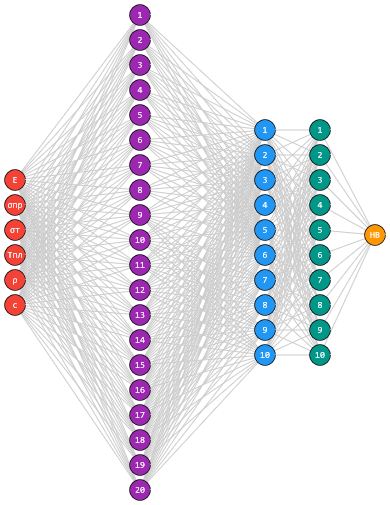

# Информация о моделях

In [6]:
model_info = model_info.dropna(axis=0)

In [7]:
model_info

,model,input,"mpe train, %","mpe test, %"
0,model1,"1)Youngs modulus, 2)Ultimate strength, 3)Yield...",17.82,20.60
8,model2,"1)Youngs modulus, 2)Ultimate strength, 3)Yield...",16.23,15.16
18,model3,"1)Youngs modulus, 2)Ultimate strength, 3)Yield...",15.06,15.45
28,model4,"1)Youngs modulus, 2)Ultimate strength, 3)Yield...",16.42,18.90
38,model5,"1)Youngs modulus, 2)Ultimate strength, 3)Yield...",35.98,36.11
48,model6,"1)Youngs modulus, 2)Ultimate strength, 3)Density",16.72,23.97
58,model7,"1)Ultimate strength, 2)Yield strength 3)Density",20.41,23.76
69,model8,"1)Ultimate strength, 2)Yield strength 3)Capacity",15.89,20.70
79,model9,"1)Young modulus, 2)Ultimate strength 3)Capacity",17.07,25.12
89,model10,"1)Young modulus, 2)Yield modulus 3)Capacity",19.54,23.85


<AxesSubplot:xlabel='mpe test, %', ylabel='input'>

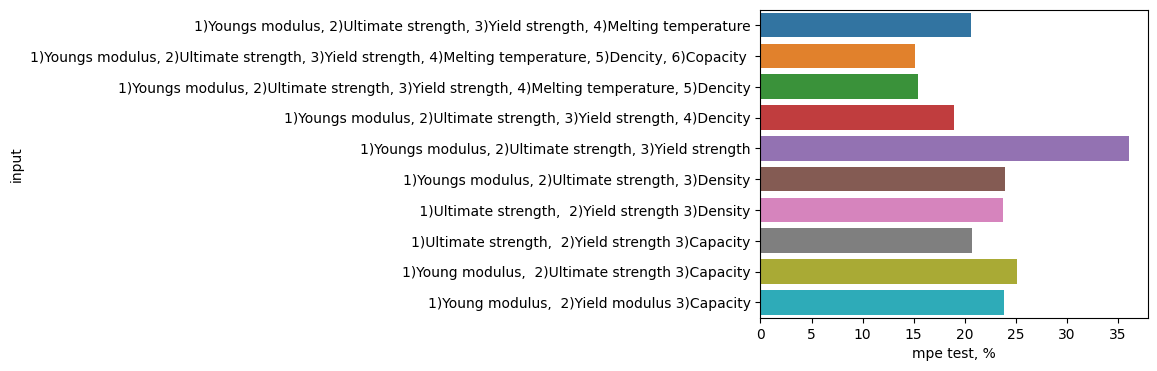

In [8]:
plt.figure(figsize=(5, 4))
sns.barplot(data=model_info, x='mpe test, %', y='input')